In [43]:
#Import Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np


In [44]:
# Load in CSV
emissions_df_orig = pd.read_csv("data/emissions.csv")

# Select necessary columns
cleaned_df = emissions_df_orig[["iso_code", "country", "year", "co2", "methane", "nitrous_oxide", "total_ghg"]]

# Remove all data prior to 1950
cleaned_filtered_df = cleaned_df[cleaned_df['year'] >= 1950]

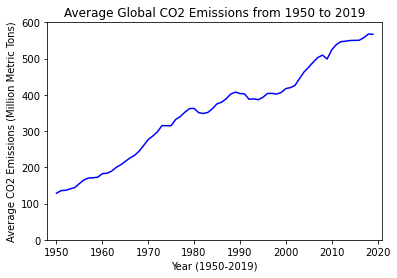

In [45]:
## Global CO2 average per year 

# Group dataframe by year
grouped_global_df = cleaned_filtered_df.groupby(["year"])

# Calculate the global average CO2 per year
avg_global_co2 = grouped_global_df["co2"].mean()

# Generate and format line graph 
x_axis = np.arange(1950, 2020, 1)
co2_plot = plt.plot(x_axis, avg_global_co2, color="blue", label="CO2" )
plt.title("Average Global CO2 Emissions from 1950 to 2019")
plt.xlabel("Year (1950-2019)")
plt.ylabel("Average CO2 Emissions (Million Metric Tons)")
plt.xlim(1948, 2021)
plt.ylim(0, 600)

plt.savefig("Images/AvgGlobalCO2.png")
plt.show()

In [54]:
# Global change by selected countries

# Create dataframes for each country 
us_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "United States"]
china_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "China"]
india_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "India"]
russia_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "Russia"]
japan_df = cleaned_filtered_df[cleaned_filtered_df['country'] == "Japan"]

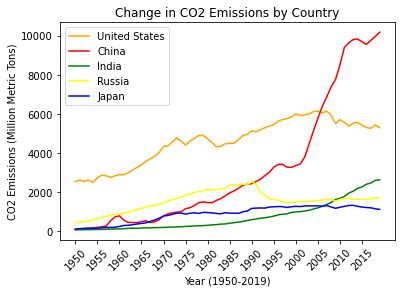

In [47]:
# Generate line graph for each countries CO2 emissions 
us_plot, = plt.plot(us_df["year"], us_df["co2"], color="orange", label="United States" )
china_plot, = plt.plot(china_df["year"], china_df["co2"], color="red", label="China" )
india_plot, = plt.plot(india_df["year"], india_df["co2"], color="green", label="India" )
russia_plot, = plt.plot(russia_df["year"], russia_df["co2"], color="yellow", label="Russia" )
japan_plot, = plt.plot(japan_df["year"], japan_df["co2"], color="blue", label="Japan" )

# Format chart
plt.xticks(np.arange(1950,2019,step=5))
plt.xticks(rotation=45)
plt.title("Change in CO2 Emissions by Country")
plt.xlabel("Year (1950-2019)")
plt.ylabel("CO2 Emissions (Million Metric Tons)")
plt.legend(handles=[us_plot, china_plot, india_plot, russia_plot, japan_plot ], loc="best")

plt.savefig("Images/CountryChangeCO2.png")
plt.show()

In [48]:
## Line graph for average emission for CO2, methane, and nitrous oxide per year

# Load in CSV to create dataframe 
emissions_df = pd.read_csv("data/question2_df.csv")
emissions_df.head()

,iso,country,year,co2,methane,nitrous_oxide,total_ghg,avg_temp_c,avg_temp_f
0,AFG,Afghanistan,2000,0.758,10.59,3.62,15.05,15.822667,60.48080
1,AFG,Afghanistan,2001,0.798,9.36,3.22,13.47,15.847917,60.52625
2,AFG,Afghanistan,2002,1.052,11.21,3.72,16.10,15.714583,60.28625
3,AFG,Afghanistan,2003,1.186,11.56,3.92,16.78,15.132583,59.23865
4,AFG,Afghanistan,2004,0.889,11.47,3.82,16.35,16.128417,61.03115


In [11]:
# Groupby year
grouped_emissions_df = emissions_df.groupby(["year"])

# Calculate averages for CO2, methane, and nitrous oxide
avg_co2_df = grouped_emissions_df["co2"].mean()
avg_methane_df = grouped_emissions_df["methane"].mean()
avg_no_df = grouped_emissions_df["nitrous_oxide"].mean()

# Create dataframe
summary_df = pd.DataFrame({"Average CO2": avg_co2_df,
                           "Average Methane": avg_methane_df, 
                           "Average Nitrous Oxide": avg_no_df})

summary_df


,Average CO2,Average Methane,Average Nitrous Oxide
year,,,
2000,454.887413,121.600444,42.705333
2001,458.145348,123.020000,43.345111
2002,469.601761,127.956889,44.674889
2003,492.452109,127.683778,44.620222
2004,518.109522,130.576000,45.745778
2005,536.110065,129.467333,45.446000
2006,553.390348,133.684889,46.500222
2007,571.370087,133.110222,47.098000
2008,583.400630,134.946889,46.842444


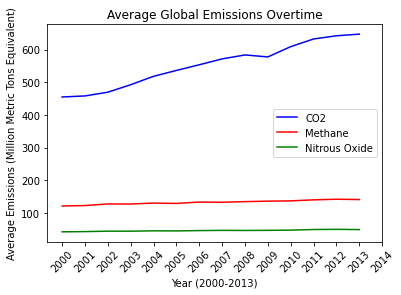

In [53]:
# Identify x-axis labels
x_axis = summary_df.index

# Generate and format line graph for average emissions over time
co2_plot, = plt.plot(x_axis, summary_df["Average CO2"], color="blue", label="CO2" )
methane_plot, = plt.plot(x_axis, summary_df["Average Methane"], color="red", label="Methane" )
nitrous_oxide_plot, = plt.plot(x_axis, summary_df["Average Nitrous Oxide"], color="green", label="Nitrous Oxide" )
plt.xticks(np.arange(2000,2015,step=1))
plt.xticks(rotation=45)
plt.title("Average Global Emissions Overtime")
plt.xlabel("Year (2000-2013)")
plt.ylabel("Average Emissions (Million Metric Tons Equivalent)")
plt.legend(handles=[co2_plot, methane_plot, nitrous_oxide_plot], loc="best")

plt.savefig("Images/AvgGlobalSplit.png")
plt.show()